<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/S%C3%A9ries_Temporais_com_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
!pip install scipy

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00


In [4]:
from pmdarima.arima import auto_arima

In [5]:
df = pd.read_excel("energy.xlsx", index_col = "DATE", parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [6]:
df.shape

(408, 1)

In [7]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [8]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [9]:
df.columns = ["producao"]

<Axes: xlabel='DATE'>

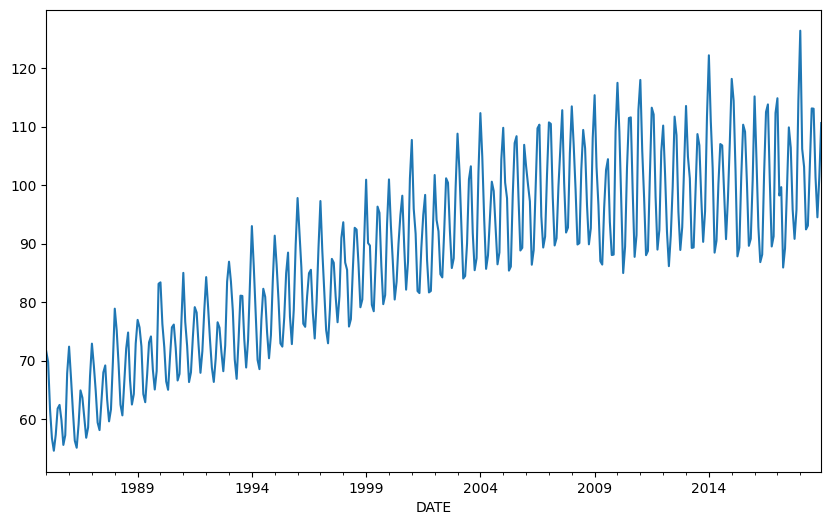

In [10]:
df["producao"].plot(figsize=(10,6))

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 800x600 with 0 Axes>

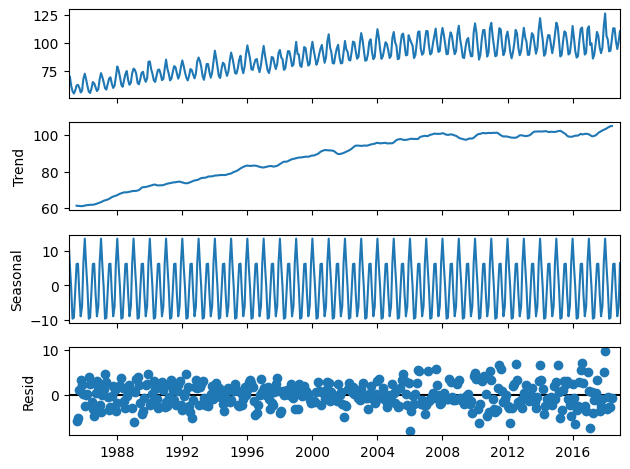

In [12]:
resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(8,6))
fig = resultado.plot()

Teste de estacionariedade. Teste adf e p valor se p valor for > 5% a hiportese nula é verdadeira, ou seja, a série não é estácionaria, logo, não temos sazionalidade.

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
result = adfuller(df["producao"].dropna())
print(f"TesteADF: {result[0]}")
print(f"p valor: {result[1]}")

TesteADF: -2.252399047046594
p valor: 0.18777984601967806


Teste se a diferença entre o dia atual e o dia anterior se tomarmops esse valor como uma nova variável se essa base vai ser ou não estacionária. Para isso vamos adicionar uma parâmetro diff, que vai pegar um valor da linha abaixo e vai trazer para cima para tirar a diferença entre eles. É possivel ver que temos uma série estacionária.

In [15]:
result = adfuller(df["producao"].diff().dropna())
print(f"TesteADF: {result[0]}")
print(f"p valor: {result[1]}")

TesteADF: -7.450892277526341
p valor: 5.67456995585561e-11


Agora vamos definir qual o melhor parametro para a minha base com o ARIMA.

In [16]:
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=True, m=6, D=1, start_P=1, start_Q=1, max_P=2, max_Q=2, information_criterion="aic", trace=True, error_action="ignore", stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.86 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.45 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=1.00 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=1.47 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.89 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=2.31 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.97 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.85 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=1.45 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=1.35 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=3.67 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

Como temos sazionalidade, vamos usar o SARIMAX

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,2,6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Fri, 26 Jan 2024   AIC                           1866.400
Time:                                        19:45:06   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.055      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.180      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [21]:
intervalo_confianca = predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[:,0]
limite_acima = intervalo_confianca.iloc[:,1]

limite_abaixo[0], limite_acima[1]

(115.1447404570401, 116.15771972144167)

In [22]:
predicao_media[0]

119.79995860497428

In [23]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

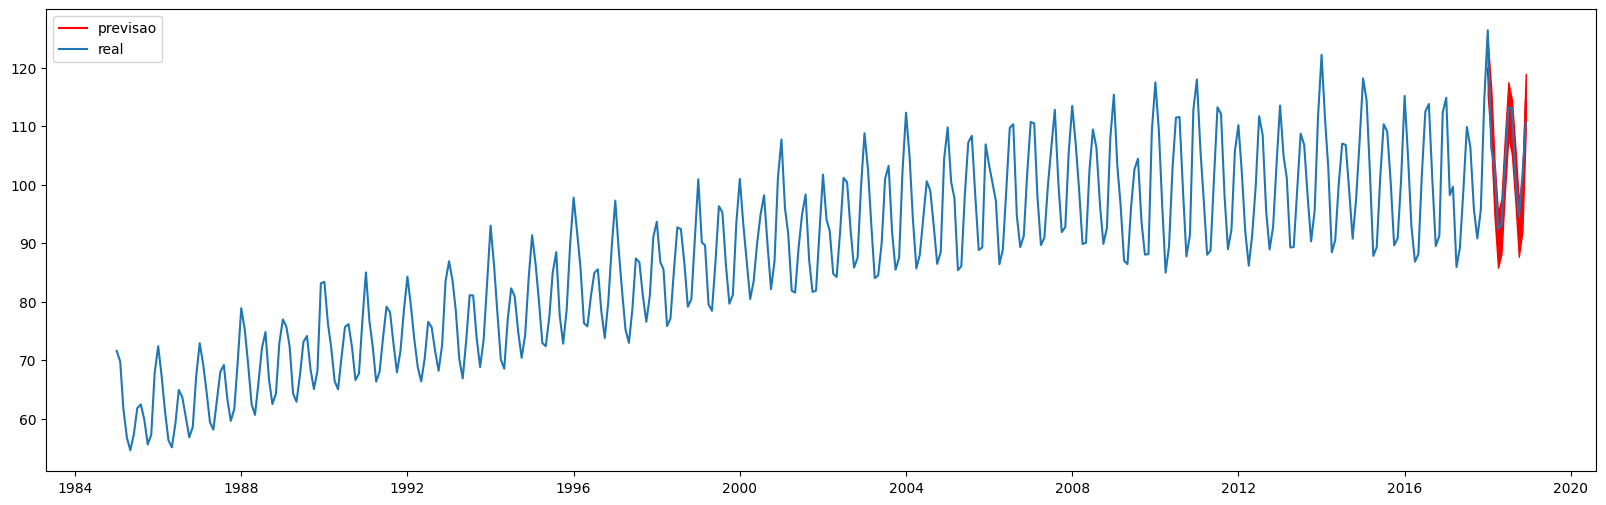

In [24]:
plt.figure(figsize=(20,6))
plt.plot(datas_previsao, predicao_media.values, color= "red", label= "previsao")
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color= "red")
plt.plot(datas, df.values, label= "real")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df[-12:].values, predicao_media.values)
print(mae)

2.7071201498891306


Verificamos que o modelo se adptou bem ao passado. Agora vamos prever o futuro.

In [26]:
forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [27]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

(91.38813005236821, 103.10930985132882)

In [28]:
forecast_medio[10]

97.24871995184851

In [29]:
datas_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicao_media.index)

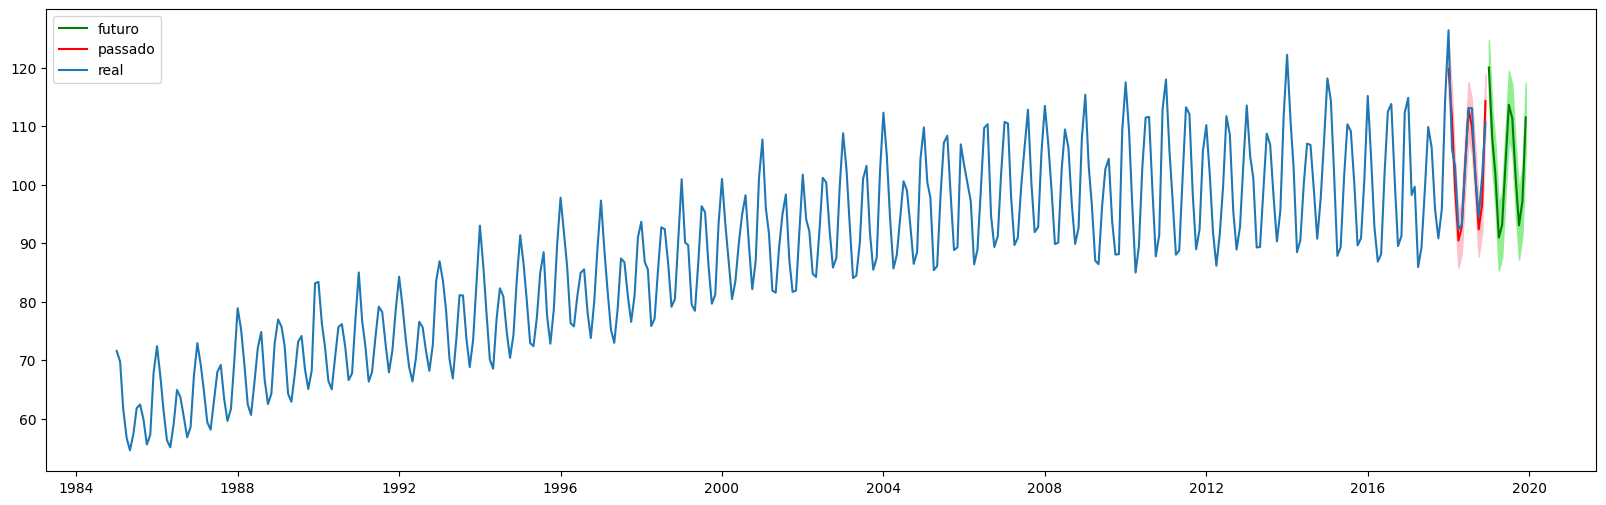

In [30]:
dates = np.asarray(df.index)
plt.figure(figsize=(20,6))
plt.plot(datas_forecast, forecast_medio.values, color="green", label="futuro")
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color="lightgreen")

plt.plot(datas_previsao, predicao_media.values, color="red", label="passado")
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color="pink")

plt.plot(dates, df.values, label="real")
plt.legend(loc="upper left")
plt.show()

In [31]:
from xgboost import XGBRegressor

In [33]:
treino = df.loc[df.index < "2016-12-31"]
validacao = df.loc[df.index > "2016-12-31"]

treino.shape, validacao.shape

((384, 1), (24, 1))

In [34]:
treino.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [35]:
treino["target"] = treino["producao"].shift(-1)

<ipython-input-35-2772846e86e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino["target"] = treino["producao"].shift(-1)


In [36]:
treino.head()

,producao,target
DATE,,
1985-01-01,71.5920,69.7870
1985-02-01,69.7870,61.6790
1985-03-01,61.6790,56.7479
1985-04-01,56.7479,54.6165
1985-05-01,54.6165,57.3509


In [37]:
treino.dropna(inplace=True)

<ipython-input-37-b8dd0b7f87ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.dropna(inplace=True)


In [38]:
validacao["target"] = validacao["producao"].shift(-1)
validacao.head()

<ipython-input-38-66ef9ff7cc40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["target"] = validacao["producao"].shift(-1)


,producao,target
DATE,,
2017-01-01,114.8282,98.2191
2017-02-01,98.2191,99.6408
2017-03-01,99.6408,85.9106
2017-04-01,85.9106,89.2053
2017-05-01,89.2053,99.1945


In [39]:
validacao.dropna(inplace=True)

<ipython-input-39-bda36cca96cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao.dropna(inplace=True)


In [40]:
X_treino = treino.loc[:, ["producao"]].values
y_treino = treino.loc[:, ["target"]].values
X_validacao= treino.loc[:, ["producao"]].values
y_validacao = treino.loc[:, ["target"]].values

In [41]:
modelo_xgba = XGBRegressor()
modelo_xgba.fit(X_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
validacao.iloc[0]

producao    114.8282
target       98.2191
Name: 2017-01-01 00:00:00, dtype: float64

In [43]:
predicao = modelo_xgba.predict(X_validacao)

In [44]:
predicao

array([ 69.96766 ,  70.07539 ,  58.107464,  55.300194,  58.194263,
        64.48436 ,  65.5325  ,  61.411835,  58.694614,  57.35527 ,
        64.48436 ,  72.65241 ,  71.643005,  67.42291 ,  60.666203,
        55.300194,  58.194263,  65.61815 ,  67.10027 ,  61.489914,
        58.009132,  58.63819 ,  65.61815 ,  72.869606,  73.7052  ,
        64.374916,  61.61087 ,  58.513393,  63.273266,  63.730232,
        70.12962 ,  64.374916,  63.730232,  58.694614,  65.5325  ,
        70.07539 ,  81.39457 ,  68.60059 ,  63.91221 ,  62.247086,
        60.666203,  69.45984 ,  70.64235 ,  68.60059 ,  64.1253  ,
        62.247086,  67.33682 ,  77.38747 ,  79.416275,  72.886894,
        65.96964 ,  67.33682 ,  66.35082 ,  74.42283 ,  75.17868 ,
        76.04581 ,  66.69394 ,  68.00873 ,  77.21698 ,  87.289024,
        78.10433 ,  74.19603 ,  68.20458 ,  66.50027 ,  67.10027 ,
        74.016945,  73.81074 ,  73.358116,  70.64235 ,  66.50027 ,
        74.42283 ,  83.34941 ,  82.72823 ,  76.994896,  74.347

In [51]:
validacao["pred"] = predicao[:23]


<ipython-input-51-8da87c38cd6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao["pred"] = predicao[:23]


In [52]:
validacao.head()

,producao,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,69.967659
2017-02-01,98.2191,99.6408,70.075394
2017-03-01,99.6408,85.9106,58.107464
2017-04-01,85.9106,89.2053,55.300194
2017-05-01,89.2053,99.1945,58.194263


In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
mean_absolute_error(X_validacao, predicao)

4.788397580250872